## 1. Load files (change main_dir and force_dir accordingly)

In [1]:
import pyemma
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.matplotlib.rcParams.update({'font.size': 15})
import MDAnalysis
import mdtraj as md
import pyemma.plots as mplt
from IPython.display import Image
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn import metrics
import seaborn as sns
import pandas as pd

In [7]:
# cd /media/biosim11/Argha_HDD/HiWi_Prof_strodel/jupyter_work/Suman_5_08/deshaw_ss/DEshaw-ab40

/media/biosim11/Argha_HDD/HiWi_Prof_strodel/jupyter_work/Suman_5_08/deshaw_ss/DEshaw-ab40


In [8]:
ls

a03ws/
a99SBdisp/
a99SB-ILDN-TIP4PD/
a99SBstar-ILDN-TIP3P/
a99SB-UCB/
ab40-desres.pdb
c22star-TIP3P/
Charmm36m/
DESRES-Trajectory_pnas2018b-Ab40-a03ws-protein.tar
DESRES-Trajectory_pnas2018b-Ab40-a99SBdisp-protein.tar
DESRES-Trajectory_pnas2018b-Ab40-a99SB-ILDN-TIP4PD-protein.tar
DESRES-Trajectory_pnas2018b-Ab40-a99SBstar-ILDN-TIP3P-protein.tar
DESRES-Trajectory_pnas2018b-Ab40-a99SB-UCB-protein.tar
DESRES-Trajectory_pnas2018b-Ab40-c22star-TIP3P-protein.tar
DESRES-Trajectory_pnas2018b-Ab40-Charmm36m-protein.tar
DESRES-Trajectory_pnas2018b-forcefield_data-a99SBdisp/
DESRES-Trajectory_pnas2018b-forcefield_data-a99SBdisp.tar
DESRES-Trajectory_pnas2018b-forcefield_data-gromacs-a99SBdisp.tar
exp_data_robustelli_PNAS_2018.tar
teest/


In [118]:
main_dir = '/media/biosim11/Argha_HDD/HiWi_Prof_strodel/jupyter_work/Suman_5_08/deshaw_ss/DEshaw-ab40/'
force_dir = main_dir + 'a99SBdisp/' + 'pnas2018b-Ab40-a99SBdisp-protein/'
force_name = 'a99SBdisp'

In [17]:
pbdfile_A40 = force_dir+'/ab40-desres.pdb'

traj_concatenated = force_dir + '/traj_concatenated.dcd'
traj_0 = force_dir +'/pnas2018b-Ab40-a99SBdisp-protein-0000.dcd'
traj_1 = force_dir +'/pnas2018b-Ab40-a99SBdisp-protein-0001.dcd'
traj_2 = force_dir +'/pnas2018b-Ab40-a99SBdisp-protein-0002.dcd'
traj_list = [traj_0, traj_1, traj_2]

In [18]:
#for checking the trajectory lenght we can use the print commands below
reader1 = MDAnalysis.coordinates.DCD.DCDReader(traj_0)
reader2 = MDAnalysis.coordinates.DCD.DCDReader(traj_1)
reader3 = MDAnalysis.coordinates.DCD.DCDReader(traj_2)
reader4 = MDAnalysis.coordinates.DCD.DCDReader(traj_concatenated)
print('traj 1:',reader1,'\n')
print('traj 2:',reader2,'\n')
print('traj 3:',reader3,'\n')
print('traj concatenated:',reader4)

traj 1: <DCDReader /media/biosim11/Argha_HDD/HiWi_Prof_strodel/jupyter_work/Suman_5_08/deshaw_ss/DEshaw-ab40/a99SBdisp/pnas2018b-Ab40-a99SBdisp-protein//pnas2018b-Ab40-a99SBdisp-protein-0000.dcd with 10000 frames of 598 atoms> 

traj 2: <DCDReader /media/biosim11/Argha_HDD/HiWi_Prof_strodel/jupyter_work/Suman_5_08/deshaw_ss/DEshaw-ab40/a99SBdisp/pnas2018b-Ab40-a99SBdisp-protein//pnas2018b-Ab40-a99SBdisp-protein-0001.dcd with 10000 frames of 598 atoms> 

traj 3: <DCDReader /media/biosim11/Argha_HDD/HiWi_Prof_strodel/jupyter_work/Suman_5_08/deshaw_ss/DEshaw-ab40/a99SBdisp/pnas2018b-Ab40-a99SBdisp-protein//pnas2018b-Ab40-a99SBdisp-protein-0002.dcd with 9977 frames of 598 atoms> 

traj concatenated: <DCDReader /media/biosim11/Argha_HDD/HiWi_Prof_strodel/jupyter_work/Suman_5_08/deshaw_ss/DEshaw-ab40/a99SBdisp/pnas2018b-Ab40-a99SBdisp-protein//traj_concatenated.dcd with 29977 frames of 598 atoms>


## 2. Feature selection (C$\alpha$)

In [19]:
feat_ab402=pyemma.coordinates.featurizer(pbdfile_A40)
feat_ab402.add_distances_ca()
print('c-alpha_dist_featdim:',feat_ab402.dimension())
#feat_ab402

c-alpha_dist_featdim: 703


In [21]:
ca_distances = pyemma.coordinates.load(traj_list, feat_ab402)
inp2 = pyemma.coordinates.source(traj_list, feat_ab402)
ca_distances_conc = pyemma.coordinates.load(traj_concatenated, feat_ab402)
inp2_conc = pyemma.coordinates.source(traj_concatenated, feat_ab402)

In [22]:
#an additional check can be done printing the trajectory leghts

print(inp2.trajectory_lengths())
print('\n')
print(inp2_conc.trajectory_lengths())

[10000 10000  9977]


[29977]


## 3. TICA dimensionality reduction (first 2 tica co-ordinates)

In [23]:
tica_obj_ca_2D = pyemma.coordinates.tica(inp2_conc, lag=50, dim=2)

In [24]:
print('dimension for c-alpha on first two tica spaces:',tica_obj_ca_2D.dimension())

dimension for c-alpha on first two tica spaces: 2


In [25]:
tics_ca_2D = tica_obj_ca_2D.get_output()
tics_ca_2D_conc=np.concatenate(tics_ca_2D)

In [30]:
np.array(tics_ca_2D)[0].shape

(29977, 2)

In [34]:
pd.DataFrame(tics_ca_2D[0])

0         1
0     -0.056269  1.293664
1      0.142959  1.316574
2     -0.058618  1.503772
3      0.023968  1.401439
4      0.065454  1.229791
...         ...       ...
29972 -0.400445  1.046963
29973 -0.318940  0.825512
29974 -0.373674  0.965640
29975 -0.376671  1.172025
29976 -0.158960  1.031721

[29977 rows x 2 columns]

Text(0, 0.5, 'TICA 2')

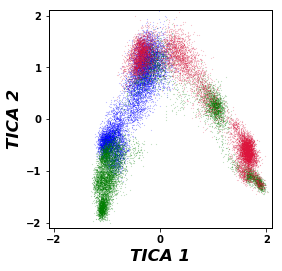

In [130]:
from pylab import *
plt.matplotlib.rcParams.update({'font.size': 20})
rc('axes', linewidth=1)

colors = ['blue', 'green', 'crimson']
time_array = [[0,10001],[10001,20001],[20001,29977]]

plt.figure(figsize=(4,4))
for i in range(3):
    plt.scatter(tics_ca_2D_conc[time_array[i][0]:time_array[i][1],0], 
                                tics_ca_2D_conc[time_array[i][0]:time_array[i][1],1],s=0.007,color = colors[i])

plt.xlim(-2.1, 2.1)
plt.ylim(-2.1, 2.1)

#fontsize = 10
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
    
plt.xlabel('TICA 1',fontsize='small', weight = 'bold',fontstyle = 'oblique') 
plt.ylabel('TICA 2',fontsize='small', weight = 'bold',fontstyle = 'oblique')

In [122]:
savetxt('tica_1_2_' + force_name + '.dat', tics_ca_2D_conc)

In [131]:
# import mdtraj as md
# t1 = md.load(traj_0, top = pbdfile_A40)
# t2 = md.load(traj_1, top = pbdfile_A40)
# t3 = md.load(traj_2, top = pbdfile_A40)
# stacked = t1.join(t2)
# stacked = stacked.join(t3)
# md.Trajectory.save_dcd(stacked,'traj_concatenated' +'.dcd')